### Importing libraries

In [547]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [548]:
#setting seed

torch.manual_seed(42)

In [549]:
#checking if there is gpu

'gpu' if torch.cuda.is_available() else 'cpu'

'cpu'

In [550]:
from sklearn.datasets import make_moons

In [551]:
# obtaining random samples of data for regression task

X, y = make_moons(n_samples = 2000,noise = 0.15,shuffle = True, random_state =2023)

In [552]:
#checking row 1 in X
X[1]

array([ 1.84044545, -0.40202529])

In [553]:
# checking target at row 1
y[1]

1

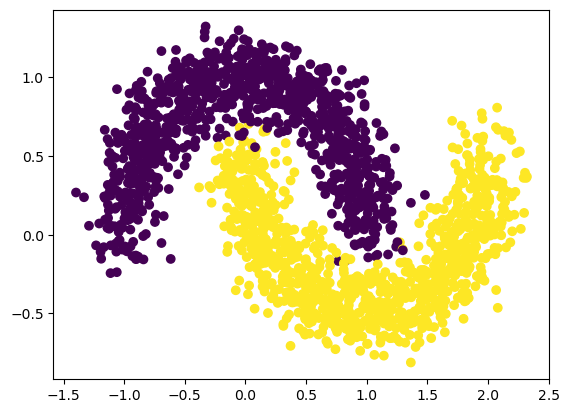

In [554]:
plt.scatter(X[:,0], X[:,1], c = y)

In [555]:
# combining the features(X) and target(y) 

data = pd.concat([pd.DataFrame(X, columns = [f'feature_{i+1}' for i in range(X.shape[1])]), pd.Series(y, name = 'target')],axis=1)

In [556]:
data.head()

,feature_1,feature_2,target
0,0.781567,0.692284,0
1,1.840445,-0.402025,1
2,-0.638501,0.429221,0
3,0.211607,0.854767,0
4,0.491902,-0.484872,1


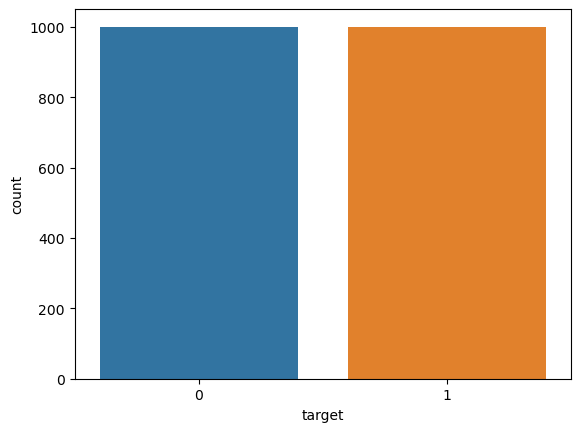

In [557]:
#histogram showing a normal distribution of the target variable
sns.countplot(data = data ,x = 'target');

In [558]:
# converting the values to torch float32 dtype

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [559]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(x_train), len(x_test), len(y_train), len(y_test)

(1600, 400, 1600, 400)

In [560]:
# class Mons(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer1 = nn.Linear(2,100)
#         self.layer2 = nn.Linear(100,150)
#         self.layer3 = nn.Linear(150,200)
#         self.layer4 = nn.Linear(200,500)
#         self.layer5 = nn.Linear(500,1)
#         self.relu = nn.ReLU()
#     def forward(self,x):
#         x = self.layer1(x)
#         x = self.relu(x)
#         x = self.layer2(x)
#         x = self.relu(x)
#         x = self.layer3(x)
#         x = self.relu(x)
#         x = self.layer4(x)
#         x = self.relu(x)
#         x = self.layer5(x)

#         return x
    
    
# or using the sequential method

class Mons(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(2,10),
            nn.ReLU(),
            nn.Linear(10,50),
            nn.ReLU(),
            nn.Linear(50,100),
            nn.ReLU(),
            nn.Linear(100,1))

    def forward(self,x):
        x = self.main(x)

        return x

In [561]:
# instantiating the model from Mons class
model = Mons()

In [562]:
BATCH_SIZE = 32 #batches of data
trainset = TensorDataset(x_train, y_train)  #pytorch dataformat
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)  #pytorch data loading format
validset = TensorDataset(x_test, y_test)#pytorch dataformat
validloader = DataLoader(validset, batch_size=BATCH_SIZE, shuffle=True)#pytorch data loading format

In [563]:
len(trainloader)

50

In [564]:
next(iter(validloader))

[tensor([[ 1.8053, -0.1785],
         [ 0.2460, -0.2106],
         [-0.6156,  0.9096],
         [ 1.0247, -0.4843],
         [-0.1507,  0.3781],
         [-0.6344,  0.6672],
         [ 1.7077, -0.3062],
         [ 0.8339,  0.7235],
         [ 0.3123, -0.5679],
         [ 0.0519,  0.8645],
         [-0.9053,  0.4083],
         [ 1.3672, -0.5219],
         [ 2.3205,  0.3694],
         [ 1.5788, -0.2002],
         [-0.0513,  0.1248],
         [ 1.4586, -0.5590],
         [ 0.0965,  0.9006],
         [-0.0482,  1.0423],
         [-0.5618,  0.7528],
         [-0.7399,  0.7660],
         [-0.9578,  0.0986],
         [-1.1646,  0.2436],
         [ 0.2793,  0.9161],
         [ 1.0476, -0.2758],
         [ 0.0627,  0.4080],
         [ 0.3784, -0.0558],
         [-0.8327,  0.8669],
         [ 0.6858, -0.5169],
         [ 1.2528, -0.0470],
         [ 0.0990, -0.0901],
         [-0.8540,  0.5185],
         [-0.9179,  0.1400]]),
 tensor([1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1

In [565]:
XX, yy = next(iter(trainloader))
print(f" Shape of feature data (X) in batch: {XX.shape}")
print(f"Shape of response data (y) in batch: {yy.shape}")

 Shape of feature data (X) in batch: torch.Size([32, 2])
Shape of response data (y) in batch: torch.Size([32])


In [566]:
LEARNING_RATE = 0.01

# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [567]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [568]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [569]:
def trainer(model, loss_fn, optimizer, trainloader, validloader, epochs=5, patience=5, verbose=True):
    """Simple training wrapper for PyTorch network."""
    
    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []
    for epoch in range(epochs):  # for each epoch
        train_batch_loss = 0
        train_batch_acc = 0
        valid_batch_loss = 0
        valid_batch_acc = 0
        
        # Training
        for X, y in trainloader:
            optimizer.zero_grad()       # Zero all the gradients w.r.t. parameters
            y_logits = model(X).flatten()
            y_pred = torch.round(torch.sigmoid(y_logits)) # Forward pass to get output
            loss= loss_fn(y_logits, y)   # Calculate loss based on output
            loss.backward()             # Calculate gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            train_batch_loss += loss.item()  # Add loss for this batch to running total
            train_batch_acc += accuracy_fn(y_true=y, y_pred=y_pred)   # Average mae for this batch
        train_loss.append(train_batch_loss / len(trainloader))     # loss = total loss in epoch / number of batches = loss per batch
        train_acc.append(train_batch_acc / len(trainloader))  # mae
        
        # Validation
        model.eval()  # this turns off those random dropout layers, we don't want them for validation!
        with torch.no_grad():  # this stops pytorch doing computational graph stuff under-the-hood and saves memory and time
            for X, y in validloader:
                y_hat = model(X).flatten() # Forward pass to get output
                test_pred = torch.round(torch.sigmoid(y_hat)) # logits -> prediction probabilities -> prediction labels
                # 2. Calcuate loss and accuracy
                valid_batch_loss += loss_fn(y_hat, y).item()
                valid_batch_acc += accuracy_fn(y_true=y,y_pred=test_pred)

        valid_loss.append(valid_batch_loss / len(validloader))
        valid_acc.append(valid_batch_acc / len(validloader))  # mae
        
        model.train()  # turn back on the dropout layers for the next training loop
        
        # Print progress
        if verbose:
            print(f"Epoch {epoch + 1}:",
                  f"Train Loss: {train_loss[-1]:.4f}.",
                  f"Valid Loss: {valid_loss[-1]:.4f}.",
                  f"Train acc: {train_acc[-1]:.4f}",
                  f"Valid acc: {valid_acc[-1]:.4f}")
        
        # Early stopping
        if epoch > 0 and valid_loss[-1] > valid_loss[-2]:
            consec_increases += 1
        else:
            consec_increases = 0
        if consec_increases == patience:
            print(f"Stopped early at epoch {epoch + 1} - val loss increased for {consec_increases} consecutive epochs!")
            break
    
    return train_loss,valid_loss,train_acc,valid_acc

In [570]:
trainloss,validloss,trainacc,validacc = trainer(model, loss_fn, optimizer, trainloader, validloader, epochs=150)

Epoch 1: Train Loss: 0.6907. Valid Loss: 0.6836. Train acc: 51.6250 Valid acc: 64.6635
Epoch 2: Train Loss: 0.6839. Valid Loss: 0.6773. Train acc: 66.5625 Valid acc: 75.9615
Epoch 3: Train Loss: 0.6770. Valid Loss: 0.6715. Train acc: 71.2500 Valid acc: 75.0000
Epoch 4: Train Loss: 0.6697. Valid Loss: 0.6646. Train acc: 71.4375 Valid acc: 71.8750
Epoch 5: Train Loss: 0.6616. Valid Loss: 0.6563. Train acc: 70.3750 Valid acc: 70.4327
Epoch 6: Train Loss: 0.6524. Valid Loss: 0.6479. Train acc: 70.1250 Valid acc: 70.9135
Epoch 7: Train Loss: 0.6419. Valid Loss: 0.6372. Train acc: 71.5625 Valid acc: 73.5577
Epoch 8: Train Loss: 0.6298. Valid Loss: 0.6258. Train acc: 72.0000 Valid acc: 73.3173
Epoch 9: Train Loss: 0.6157. Valid Loss: 0.6102. Train acc: 73.0625 Valid acc: 74.7596
Epoch 10: Train Loss: 0.5994. Valid Loss: 0.5941. Train acc: 74.0000 Valid acc: 74.2788
Epoch 11: Train Loss: 0.5810. Valid Loss: 0.5730. Train acc: 75.1875 Valid acc: 75.9615
Epoch 12: Train Loss: 0.5605. Valid Loss:

Epoch 95: Train Loss: 0.0528. Valid Loss: 0.0626. Train acc: 98.5625 Valid acc: 98.0769
Epoch 96: Train Loss: 0.0517. Valid Loss: 0.0602. Train acc: 98.6875 Valid acc: 98.0769
Epoch 97: Train Loss: 0.0504. Valid Loss: 0.0597. Train acc: 98.7500 Valid acc: 98.3173
Epoch 98: Train Loss: 0.0501. Valid Loss: 0.0628. Train acc: 98.6875 Valid acc: 97.3558
Epoch 99: Train Loss: 0.0488. Valid Loss: 0.0581. Train acc: 98.7500 Valid acc: 98.3173
Epoch 100: Train Loss: 0.0476. Valid Loss: 0.0638. Train acc: 98.6875 Valid acc: 97.8365
Epoch 101: Train Loss: 0.0471. Valid Loss: 0.0539. Train acc: 98.6250 Valid acc: 98.3173
Epoch 102: Train Loss: 0.0463. Valid Loss: 0.0548. Train acc: 98.6875 Valid acc: 98.3173
Epoch 103: Train Loss: 0.0456. Valid Loss: 0.0603. Train acc: 98.8750 Valid acc: 98.0769
Epoch 104: Train Loss: 0.0450. Valid Loss: 0.0560. Train acc: 98.7500 Valid acc: 98.0769
Epoch 105: Train Loss: 0.0440. Valid Loss: 0.0558. Train acc: 98.8125 Valid acc: 98.0769
Epoch 106: Train Loss: 0.0

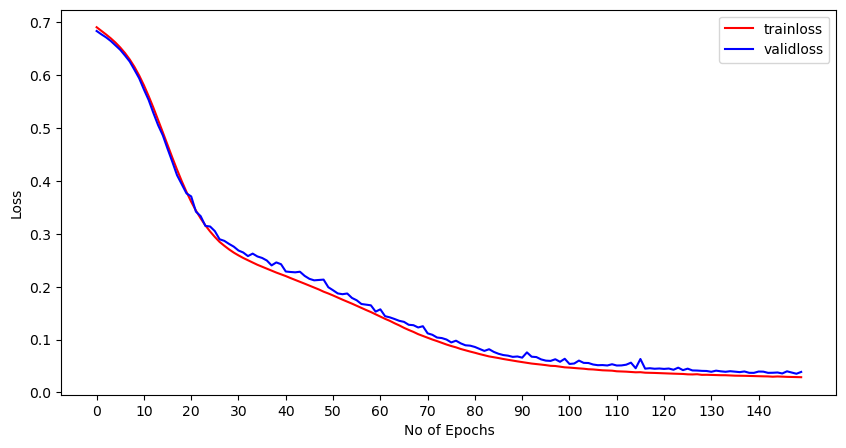

In [571]:
plt.figure(figsize = (10,5))
plt.plot(range(len(trainloss)), trainloss ,c='red',)
plt.plot(range(len(trainloss)),validloss ,c='blue')
plt.xticks(np.arange(0,len(trainloss),10))
plt.legend(['trainloss','validloss'])
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.show()


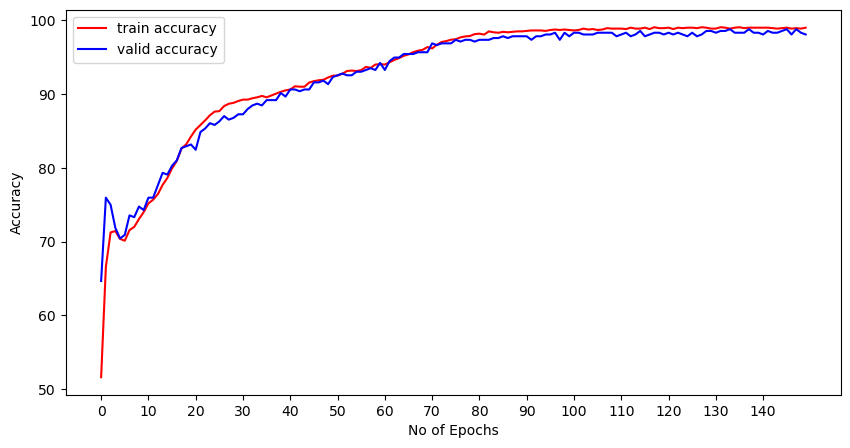

In [572]:
plt.figure(figsize = (10,5))
plt.plot(range(len(trainacc)), trainacc ,c='red',)
plt.plot(range(len(trainacc)),validacc ,c='blue')
plt.xticks(np.arange(0,len(trainloss),10))
plt.legend(['train accuracy','valid accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.show()


As seen in the two graphs above, the loss reduced drastically and accuracy increased over a very large number of epochs

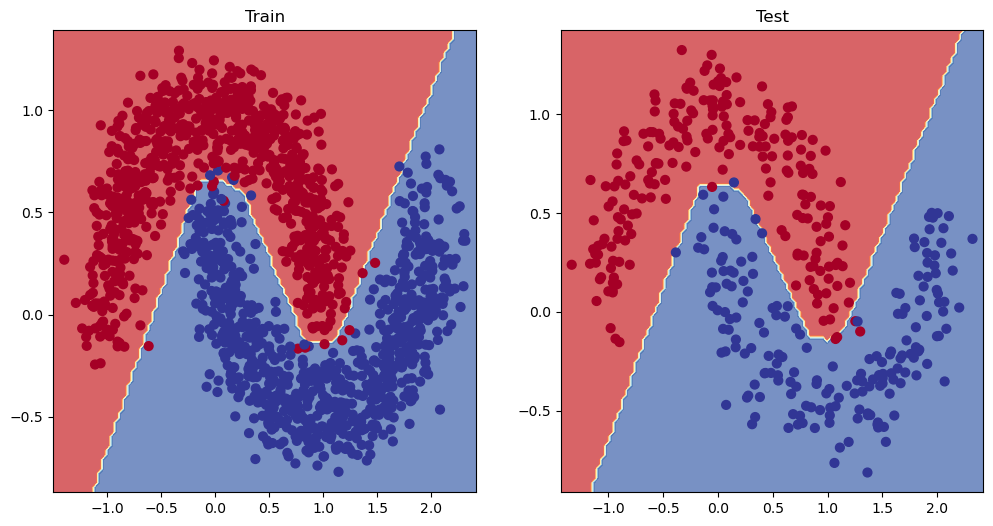

In [573]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)